In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

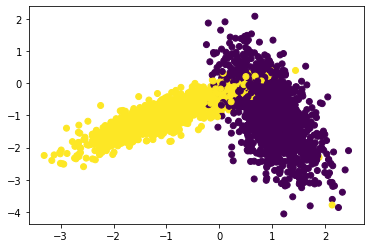

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [0]:
import itertools


def compute_fold_group(folds , no_of_ele_in_train):
  combination = list( itertools.combinations([i for i in range(0,folds)],( no_of_ele_in_train)) )
  combination_list = []
  all_folds = set();
  for i in range(0,folds):
    all_folds.add(i)

  for j in combination:
    each_grp = []
    each_set = set(j)
    each_grp.append(each_set)
    each_grp.append(all_folds - each_set)

    combination_list.append(each_grp)
  return combination_list;


  0%|          | 0/10 [00:00<?, ?it/s]


Hyper-parameters : 
{'n_neighbors': [7, 13, 14, 17, 23, 24, 31, 33, 39, 45]}


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


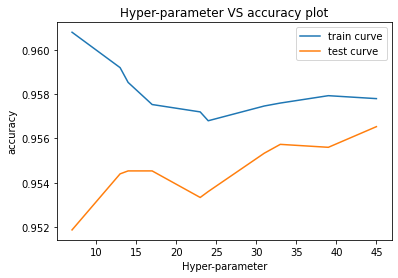

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


def RandomSearchCV(x_train,y_train,classifier, param_range, folds):

  idxgroup = [0 for i in range(0,folds)]

  combination_of_folds = compute_fold_group( folds , folds - 1) ;

  len_of_x_train = len(x_train)
  each_division = int(len_of_x_train / folds );
  for i in range(0, folds ):
    if i != ( folds - 1 ) :
      start_index = ( i * each_division)
      end_index = ( (i+1) * each_division)
      idxgroup[i] = [ i for i in range( start_index , end_index )]
    else :
      start_index = ( i * each_division)
      end_index = len_of_x_train
      idxgroup[i] = [ i for i in range( start_index , end_index )]


  train_scores = []
  cv_scores  = []    
  for k in tqdm(param_range['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []

        for j in range(0, folds):
            groups = combination_of_folds[j]
            #print( groups )
            train_indices = []
            test_indices = []
            for e_group in groups[0]:
              train_indices = ( train_indices + idxgroup[ e_group ] );
              #print("e_group-1")
              #print(e_group)
              
            #print( len(train_indices))
            for e_group in groups[1]:
              test_indices = ( test_indices + idxgroup[ e_group ] );
              #print("e_group-2")
              #print(e_group)
            #print(len(test_indices))
            #print()


            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors= k
            classifier.fit(X_train , Y_train)

            y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test , y_predicted))

            Y_tr_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score( Y_train , Y_tr_predicted ))

        train_scores.append(np.mean(np.array( trainscores_folds )))
        cv_scores.append(np.mean(np.array( testscores_folds )))
  return train_scores , cv_scores ;




neigh = KNeighborsClassifier()

params = {'n_neighbors':[]}
random_neighb = random.sample(range(1, 51), 10 )
random_neighb = sorted( random_neighb )
print()
print("Hyper-parameters : ")
params['n_neighbors'] = random_neighb
print( params )
folds = 3

trainscores , cvscores = RandomSearchCV(X_train, y_train , neigh , params , folds )

plt.plot(params['n_neighbors'],trainscores, label='train curve')
plt.plot(params['n_neighbors'],cvscores, label='test curve')
plt.title('Hyper-parameter VS accuracy plot')
plt.xlabel("Hyper-parameter")
plt.ylabel("accuracy")
plt.legend()
plt.show()

**Observation**

Here, 45 nearest neighbour hyper-parameter found to be fit with test data.

The 45 nearest neighbour value is taken to plot decision boundary.

The decision boundary plot is shown as below with n_neighbors = 45

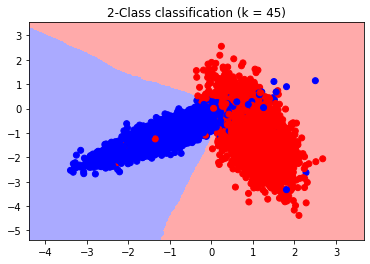

In [68]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 45)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)
